# Luiz Henrique dos Santos Faleiros
# GU3003825

In [180]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Criando as datas para numeros

In [181]:
months = {'jan': 1, 'feb': 2, 'mar':3, 'apr': 4, 'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
day_of_week = {'mon':0,'tue':1,'wed':2,'thu':3,'fri':4,'sat':5,'sun':6}

In [182]:
ff = pd.read_csv('forestfires.csv')

In [183]:
ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [184]:
ff['month'] = ff['month'].map(months)

In [185]:
ff['day'] = ff['day'].map(day_of_week)

In [186]:
ff.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [187]:
ff = ff[ff['area'] > 0]

In [188]:
ff['BUI'] = (0.8*ff['DMC']*ff['DC'])/(ff['DMC']+ 0.4*ff['DC'])

In [189]:
ff.loc[ff['area'] > 0, 'hasFire'] = 1
ff.loc[ff['area'] < 0.1, 'hasFire'] = 0

In [190]:
ff['area'] = np.log(ff['area']+1)

In [191]:
ff

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,BUI,hasFire
138,9,9,7,1,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.307485,69.732673,1.0
139,1,4,9,1,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.357674,176.497663,1.0
140,2,5,9,0,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.385262,173.208178,1.0
141,1,2,8,2,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.438255,134.404482,1.0
142,8,6,8,4,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.476234,143.081770,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,8,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,1.153732,214.743668,1.0
510,6,5,8,4,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.357674,214.743668,1.0
512,4,3,8,6,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871,93.489862,1.0
513,2,4,8,6,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592,93.489862,1.0


[Text(0.5, 0, 'Meses'), Text(0, 0.5, 'Queimadas')]

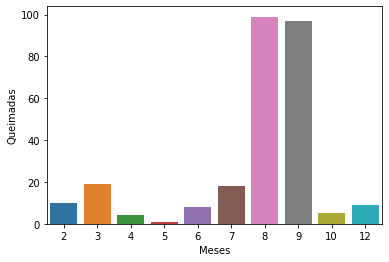

In [192]:
countplot = sns.countplot(x=ff['month'])
countplot.set(xlabel="Meses", ylabel="Queimadas")

[Text(0.5, 0, 'Meses'), Text(0, 0.5, 'Temperatura')]

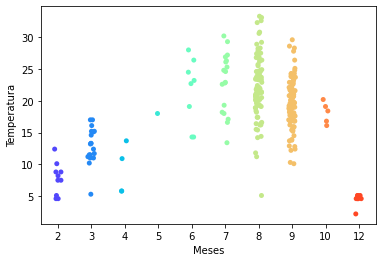

In [193]:
strip = sns.stripplot(x='month', y='temp', data=ff,palette='rainbow')
strip.set(xlabel="Meses", ylabel="Temperatura")

<AxesSubplot:xlabel='month', ylabel='DMC'>

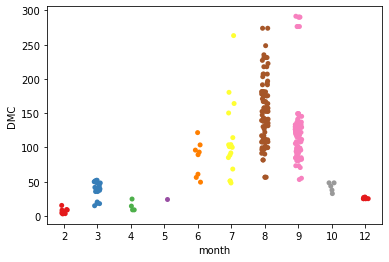

In [194]:
sns.stripplot(x='month',y='DMC',data=ff,palette='Set1')

<AxesSubplot:xlabel='month', ylabel='FFMC'>

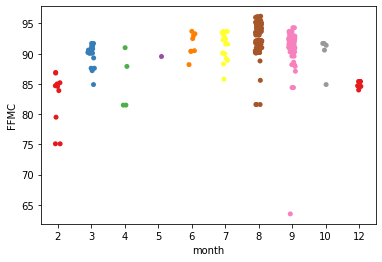

In [195]:
sns.stripplot(x='month',y='FFMC',data=ff,palette='Set1')

<AxesSubplot:xlabel='month', ylabel='BUI'>

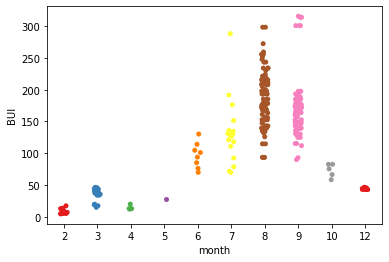

In [196]:
sns.stripplot(x='month',y='BUI',data=ff,palette='Set1')

<AxesSubplot:xlabel='month', ylabel='DC'>

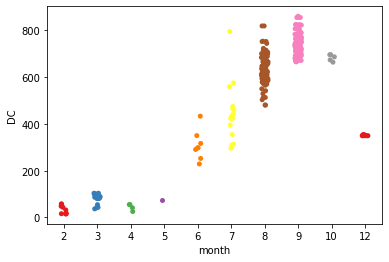

In [197]:
sns.stripplot(x='month',y='DC',data=ff,palette='Set1')

<AxesSubplot:>

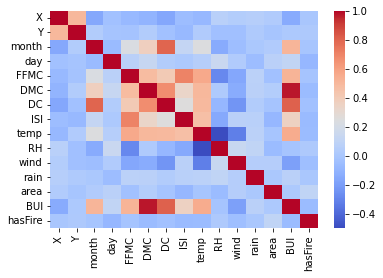

In [198]:
sns.heatmap(ff.corr(), cmap='coolwarm')

In [199]:
ff.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'BUI', 'hasFire'],
      dtype='object')

In [200]:
x = ff[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'RH',
       'wind', 'rain', 'area', 'BUI']]
y = ff['temp']

In [201]:
x_train, x_teste, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=110)

In [202]:
lm = LinearRegression()

In [203]:
lm.fit(x_train,y_train)

LinearRegression()

In [204]:
print(lm.intercept_)

28.746586964278286


In [205]:
print(lm.coef_)

[ 0.05493009  0.13507794 -0.92936287  0.33198677 -0.08087577 -0.06305072
  0.00513243  0.39690839 -0.19248361 -0.52111698  1.47452732 -0.05003365
  0.09642158]


In [206]:
coeficiente = pd.DataFrame(lm.coef_,x.columns, columns=['Coeficiente'])

In [207]:
coeficiente

,Coeficiente
X,0.054930
Y,0.135078
month,-0.929363
day,0.331987
FFMC,-0.080876
DMC,-0.063051
DC,0.005132
ISI,0.396908
RH,-0.192484
wind,-0.521117


In [208]:
predict = lm.predict(x_teste)

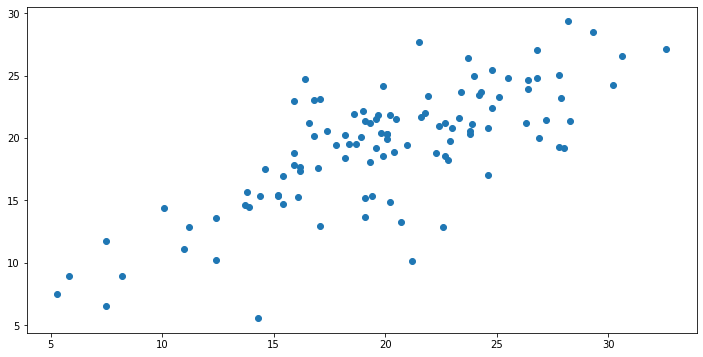

In [209]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predict)

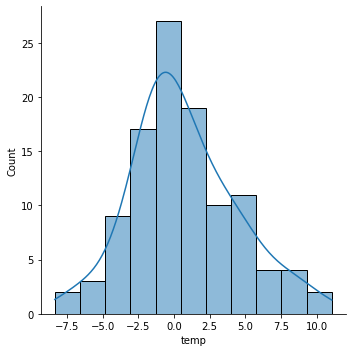

In [210]:
sns.displot((y_test-predict), kde=True)

In [211]:
print('MAE', metrics.mean_absolute_error(y_test,predict))

MAE 2.864189243770059


In [212]:
print('MSE', metrics.mean_squared_error(y_test,predict))

MSE 14.201164196722264


In [213]:
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predict)))

RMSE 3.7684432059833757
